In [31]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [32]:
# load the dataset
fertilizer = pd.read_csv("datasets\Fertilizer Prediction.csv")
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37.0,0.0,0.0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12.0,0.0,36.0,DAP
2,34.0,65.0,62.0,Black,Cotton,7.0,9.0,30.0,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22.0,0.0,20.0,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35.0,0.0,0.0,Urea


In [34]:
# check the shape of the dataset
fertilizer.shape

(599, 9)

In [35]:
# check the basic info of the dataset
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      599 non-null    float64
 1   Humidity         599 non-null    float64
 2   Moisture         599 non-null    float64
 3   Soil Type        599 non-null    object 
 4   Crop Type        599 non-null    object 
 5   Nitrogen         599 non-null    float64
 6   Potassium        599 non-null    float64
 7   Phosphorous      599 non-null    float64
 8   Fertilizer Name  599 non-null    object 
dtypes: float64(6), object(3)
memory usage: 42.2+ KB


In [36]:
# check the missing values in the dataset
fertilizer.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [37]:
# check the duplicated values in the dataset
fertilizer.duplicated().sum()

np.int64(0)

In [38]:
# check the basic statistics of the dataset
fertilizer.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,30.258875,58.923451,43.319012,19.312912,4.792122,19.288420
std,3.622974,6.006582,11.700067,12.523457,6.192190,13.696578
min,22.223979,44.620434,20.254963,0.000000,0.000000,0.000000
25%,27.464095,54.000000,33.909017,10.000000,0.000000,7.979880
50%,29.911574,59.047738,41.557400,15.027089,2.070600,18.278680
75%,32.956768,63.973607,51.690008,28.992830,8.028008,30.303092
max,40.912289,74.516642,69.632590,49.018975,29.494019,49.698696


In [39]:
# Only select the numerical columns
fertilizer_numeric = fertilizer.select_dtypes(include=[np.number])
corr = fertilizer_numeric.corr()
corr

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.839204,0.122398,-0.030499,-0.016231,0.217312
Humidity,0.839204,1.000000,0.122707,-0.006235,-0.006586,0.178896
Moisture,0.122398,0.122707,1.000000,-0.120302,-0.001652,0.101922
Nitrogen,-0.030499,-0.006235,-0.120302,1.000000,-0.355186,-0.621257
Potassium,-0.016231,-0.006586,-0.001652,-0.355186,1.000000,0.049865
Phosphorous,0.217312,0.178896,0.101922,-0.621257,0.049865,1.000000


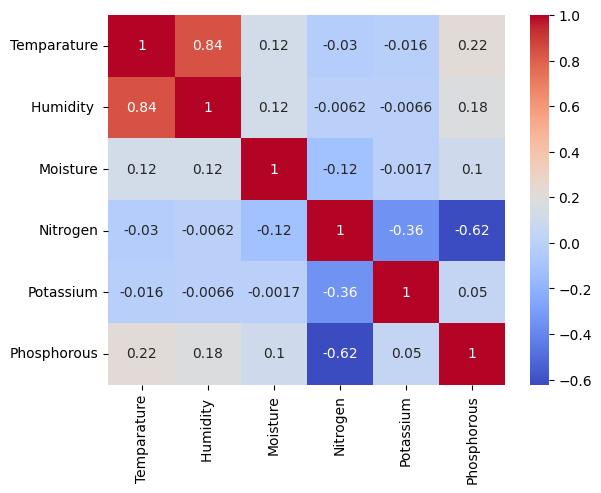

In [40]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')
plt.show()

In [41]:
fertilizer['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        138
DAP         108
28-28       101
14-35-14     92
20-20        87
10-26-26     42
17-17-17     31
Name: count, dtype: int64

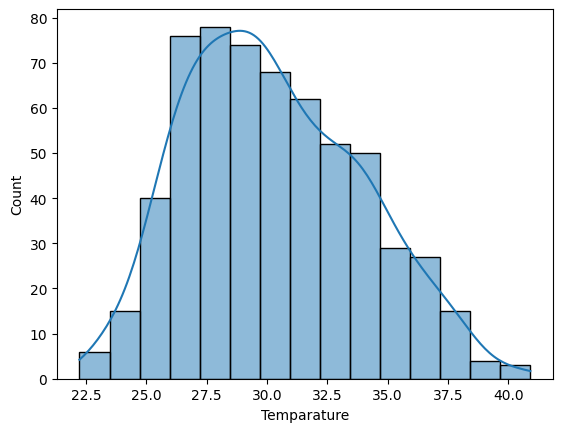

In [42]:
# check the distribution of the temperature column
sns.histplot(fertilizer['Temparature'], kde=True)
plt.show()

In [43]:
# Only select the numerical columns 
features = fertilizer.select_dtypes(include=[np.number]).columns.tolist()
print(features)

['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']


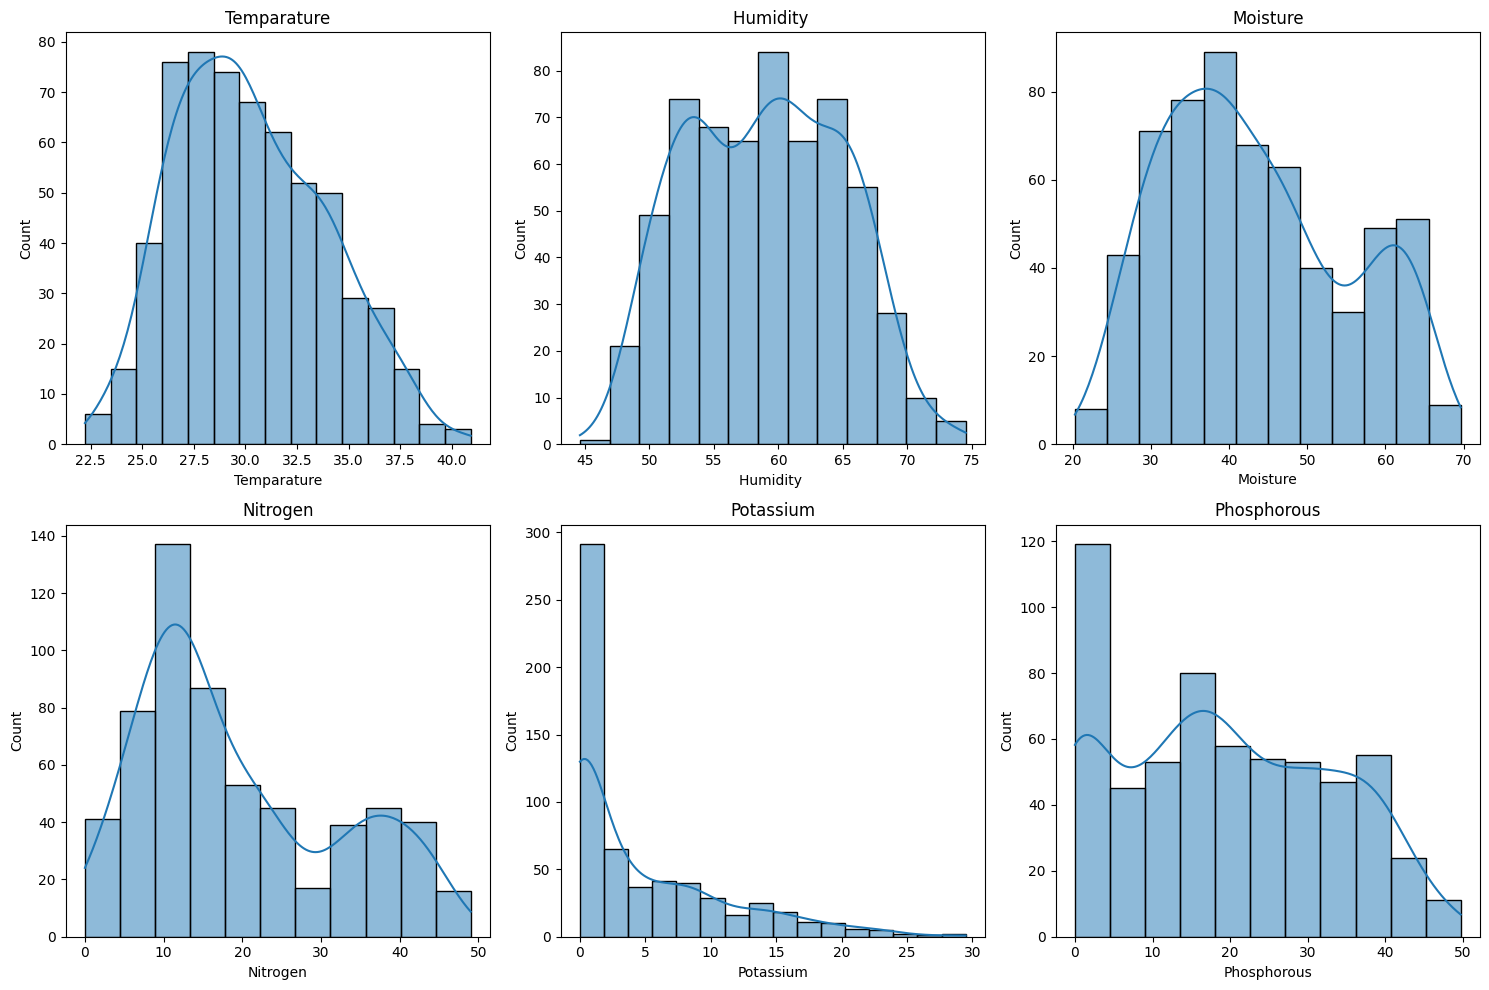

In [44]:
# visualize the distribution of each feature
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(fertilizer[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

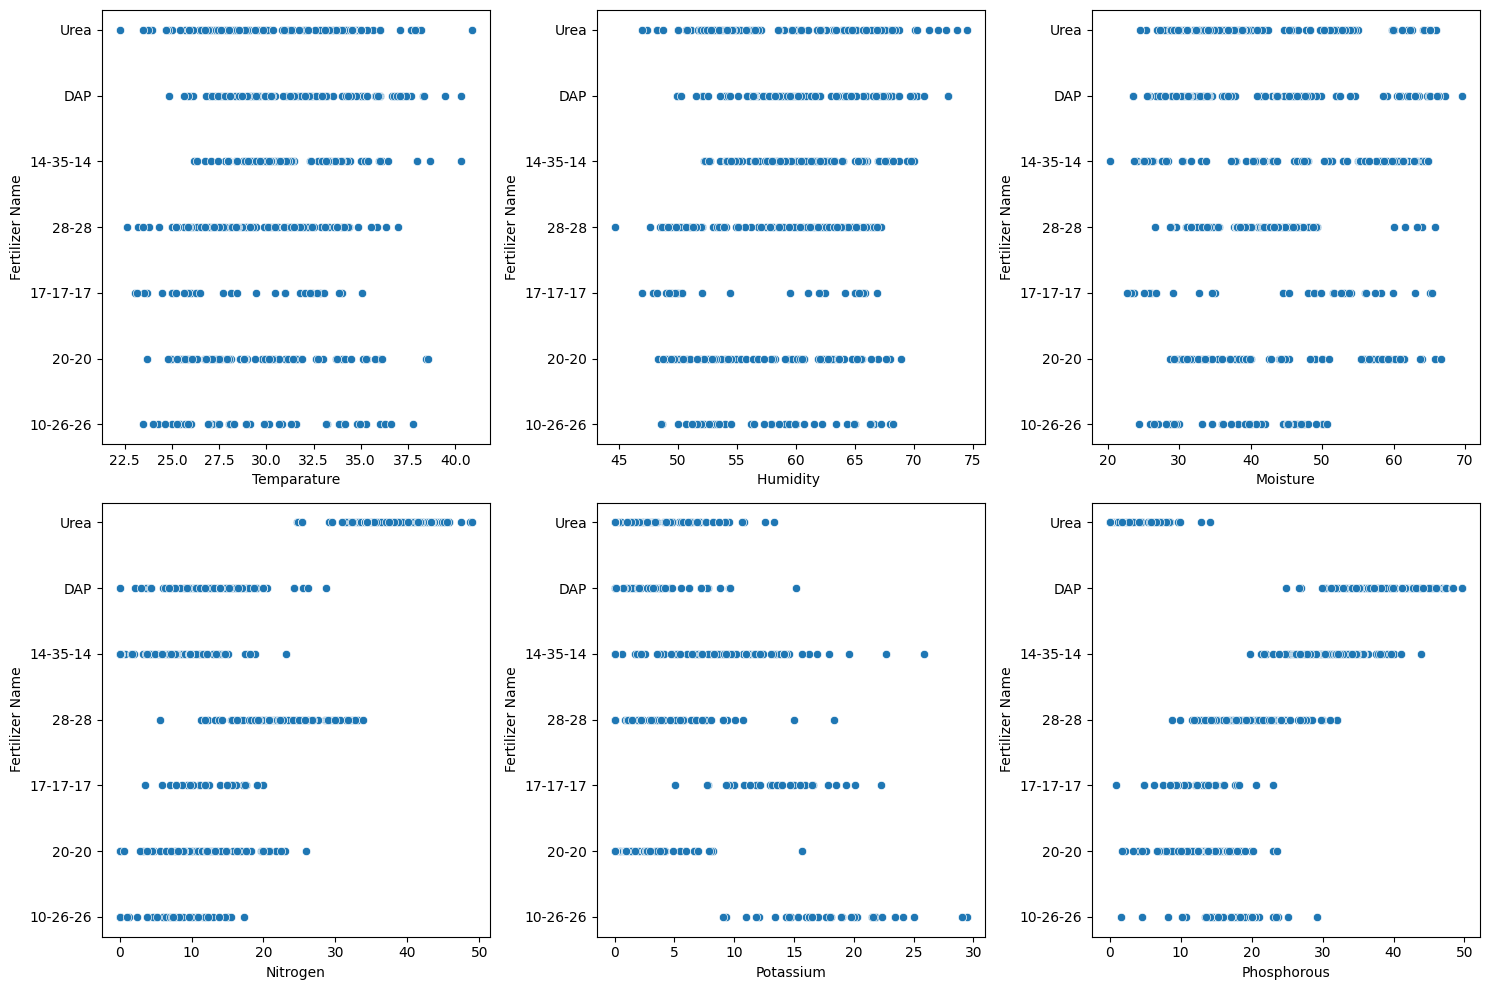

In [46]:
# plot scatter plot of each feature against the target
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='Fertilizer Name', data=fertilizer, ax=subplot)
plt.tight_layout()
plt.show()

#### Encoding the target column

In [47]:
fert_dict = {
'Urea':1,
'DAP':2,
'14-35-14':3,
'28-28':4,
'17-17-17':5,
'20-20':6,
'10-26-26':7,
}

In [48]:
fertilizer['fert_no'] = fertilizer['Fertilizer Name'].map(fert_dict)

In [49]:
fertilizer['fert_no'].value_counts()

fert_no
1    138
2    108
4    101
3     92
6     87
7     42
5     31
Name: count, dtype: int64

In [50]:
# drop the target column with name and keep the target column with numbers
fertilizer.drop('Fertilizer Name',axis=1,inplace=True)
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26.0,52.0,38.0,Sandy,Maize,37.0,0.0,0.0,1
1,29.0,52.0,45.0,Loamy,Sugarcane,12.0,0.0,36.0,2
2,34.0,65.0,62.0,Black,Cotton,7.0,9.0,30.0,3
3,32.0,62.0,34.0,Red,Tobacco,22.0,0.0,20.0,4
4,28.0,54.0,46.0,Clayey,Paddy,35.0,0.0,0.0,1


In [51]:
# Select the object columns
fertilizer.select_dtypes(include=['object']).columns

Index(['Soil Type', 'Crop Type'], dtype='object')

In [52]:
# convert the categorical columns to numerical columns using labelencoder
lb = LabelEncoder()
fertilizer["Soil Type"]=lb.fit_transform(fertilizer['Soil Type'])
fertilizer['Crop Type']=lb.fit_transform(fertilizer['Crop Type'])

In [53]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26.0,52.0,38.0,4,3,37.0,0.0,0.0,1
1,29.0,52.0,45.0,2,8,12.0,0.0,36.0,2
2,34.0,65.0,62.0,0,1,7.0,9.0,30.0,3
3,32.0,62.0,34.0,3,9,22.0,0.0,20.0,4
4,28.0,54.0,46.0,1,6,35.0,0.0,0.0,1


In [54]:
# split the dataset into features and target
x = fertilizer.drop('fert_no',axis=1)
y = fertilizer['fert_no']
# print the shape of features and target
print(f"The shape of features is: {x.shape}")
print(f"The shape of target is: {y.shape}")

The shape of features is: (599, 8)
The shape of target is: (599,)


In [55]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

# print the shape of training and testing sets
print(f"The shape of x_train is: {x_train.shape}")
print(f"The shape of x_test is: {x_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of x_train is: (479, 8)
The shape of x_test is: (120, 8)
The shape of y_train is: (479,)
The shape of y_test is: (120,)


### Scaling

In [56]:
# Scale the features using StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Training Models

In [57]:
# insialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

In [58]:
# train the model
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [59]:
# evaluate the model on the test set and print the accuracy
accuracy = model.score(x_test, y_test)
print(f"The accuracy of the model is: {accuracy*100:.2f}%")

The accuracy of the model is: 84.17%


In [60]:
# evaluate the model on the training set and print the accuracy
accuracy = model.score(x_train, y_train)
print(f"The accuracy of the model on the training set is: {accuracy*100:.2f}%")

The accuracy of the model on the training set is: 100.00%


## Predictive System

In [61]:
def recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous):
    features = np.array([[Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous]])
    transformed_features = sc.transform(features)
    prediction = model.predict(transformed_features).reshape(1,-1)
    fert_dict = {1: 'Urea', 2: 'DAP', 3: '14-35-14', 4: '28-28', 5: '17-17-17', 6: '20-20', 7: '10-26-26'}
    fertilizer = [fert_dict[i] for i in prediction[0]]
    
    return f"{fertilizer} is the best fertilizer for the given conditions" 

In [62]:
# Given input values
Temparature = 28
Humidity = 1
Moisture = 0.6
Soil_Type = 3
Crop_Type = 2
Nitrogen = 15
Potassium = 20
Phosphorous = 8
    
# Use the recommendation function to get a prediction
recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type,Crop_Type, Nitrogen, Potassium, Phosphorous)

"['17-17-17'] is the best fertilizer for the given conditions"